In [1]:
import numpy as np
import h5py
import os
from dataviz import view_sample, show_aneurysm

%matplotlib inline

In [2]:
data = []
for root, dirs, filenames in os.walk('augmented_data/'):  # adapt path
    for file in filenames:
        data.append(h5py.File(f'{root}{file}'))

In [3]:
print(f'Data shape : \n'
      f'Raws : {data[0]["raw"].shape}\n'
      f'Labels : {data[0]["label"].shape}\n'
      f'Data type : \n'
      f'Raws : {data[0]["raw"].dtype}\n'
      f'Labels : {data[0]["label"].dtype}')

Data shape : 
Raws : (64, 32, 32)
Labels : (64, 32, 32)
Data type : 
Raws : uint8
Labels : uint8


In [4]:
# Is there 1 and only 1 aneurysm per sample ?
no_aneurysm_samples = 0
multiple_aneurysms = 0

for sample_idx, sample in enumerate(data):
    max_arr = np.zeros(shape=len(sample['label']))
    for lab_idx, label in enumerate(sample['label']):
        max_arr[lab_idx] = label.max()
    labeled = np.trim_zeros(max_arr)
    if labeled.size == 0:
        print(f'At sample {sample_idx}, there is no aneurysm')
        no_aneurysm_samples += 1
    if labeled.min() == 0:
        print(f'At sample {sample_idx}, there is more than one aneurysm')
        multiple_aneurysms += 1

print(f'\nTotal irregular samples : {no_aneurysm_samples + multiple_aneurysms}\n'
      f'Samples with no aneurysm : {no_aneurysm_samples}\n'
      f'Samples with more than one aneurysm : {multiple_aneurysms}')


Total irregular samples : 0
Samples with no aneurysm : 0
Samples with more than one aneurysm : 0


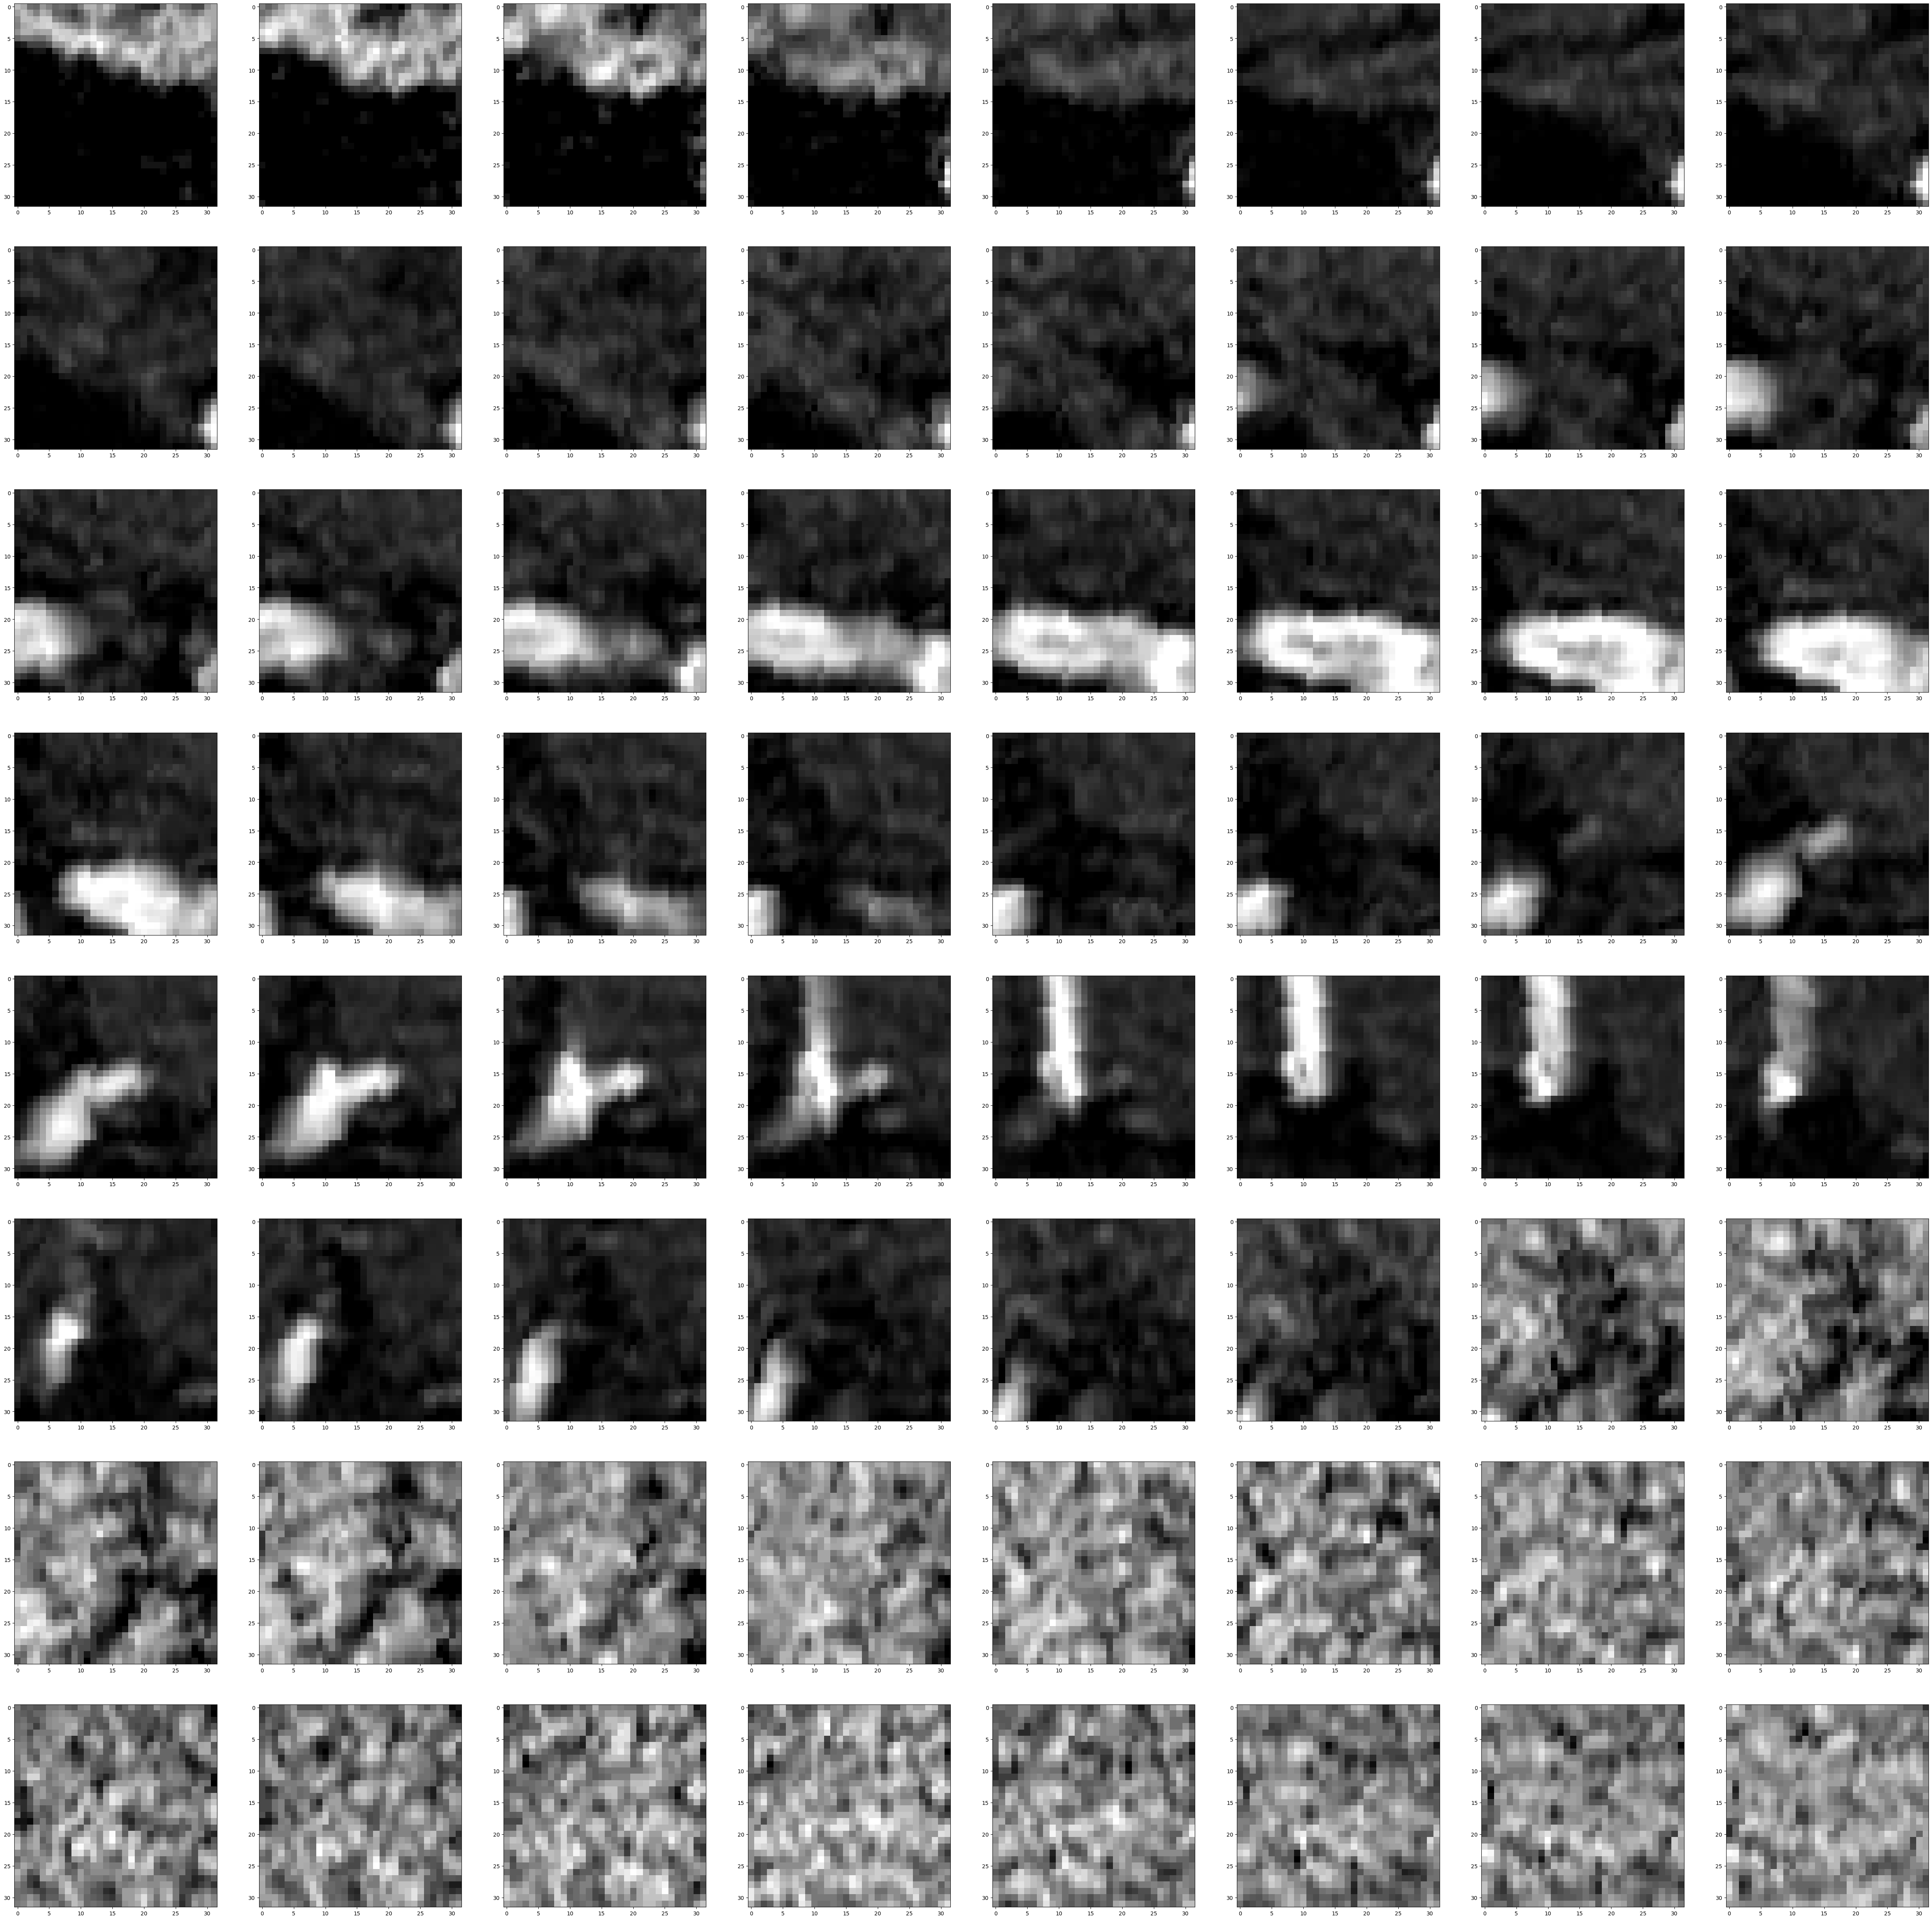

In [5]:
view_sample(data, 5, 'raw')

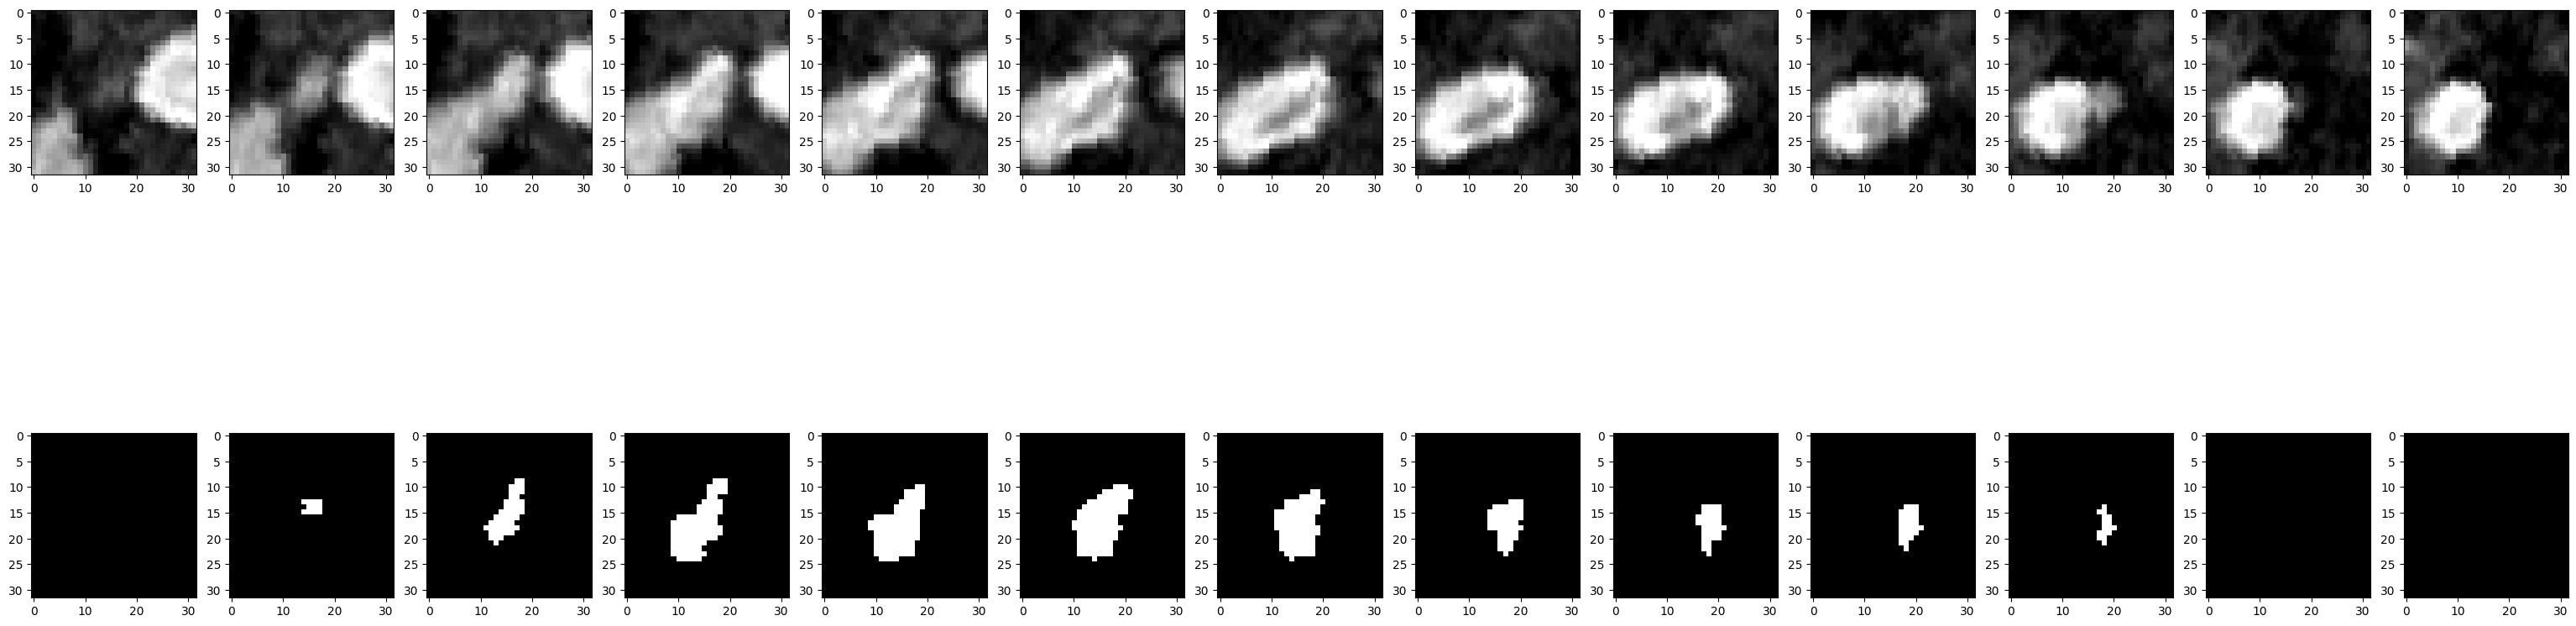

In [11]:
show_aneurysm(data, 2, 6, 'gray', 'gray')